Chapter 13


## Probabilistic Reasoning

In [1]:
import math
import matplotlib.pyplot as plt

In [2]:
dataset = [
    ['Sunny', 'Hot', 'No'],
    ['Sunny', 'Hot', 'No'],
    ['Overcast', 'Hot', 'Yes'],
    ['Rain', 'Mild', 'Yes'],
    ['Rain', 'Cool', 'Yes'],
    ['Rain', 'Cool', 'No'],
    ['Overcast', 'Cool', 'Yes'],
    ['Sunny', 'Mild', 'No'],
    ['Sunny', 'Cool', 'Yes'],
    ['Rain', 'Mild', 'Yes'],
    ['Sunny', 'Mild', 'Yes'],
    ['Overcast', 'Mild', 'Yes'],
    ['Overcast', 'Hot', 'Yes'],
    ['Rain', 'Mild', 'No']
]

In [3]:
# Train function
def train_naive_bayes(data):
    label_counts = {}
    feature_counts = {}

    for row in data:
        outlook, temp, label = row

        # Count labels
        label_counts[label] = label_counts.get(label, 0) + 1

        # Count features conditional on labels
        if label not in feature_counts:
            feature_counts[label] = {"Outlook": {}, "Temp": {}}

        feature_counts[label]["Outlook"][outlook] = feature_counts[label]["Outlook"].get(outlook, 0) + 1
        feature_counts[label]["Temp"][temp] = feature_counts[label]["Temp"].get(temp, 0) + 1

    return label_counts, feature_counts

In [4]:
# Predict function
def predict_naive_bayes(x, label_counts, feature_counts):
    total = sum(label_counts.values())
    probs = {}

    for label in label_counts:
        # Prior probability
        probs[label] = label_counts[label] / total

        # Likelihood (multiply conditional probabilities)
        for i, feature in enumerate(["Outlook", "Temp"]):
            value = x[i]
            count = feature_counts[label][feature].get(value, 0)
            probs[label] *= (count + 1) / (label_counts[label] + len(feature_counts[label][feature]))  # Laplace smoothing

    return max(probs, key=probs.get)

In [5]:

# Train model
label_counts, feature_counts = train_naive_bayes(dataset)

# Test prediction
test_sample = ['Sunny', 'Hot']  # Outlook=Sunny, Temp=Cool
prediction = predict_naive_bayes(test_sample, label_counts, feature_counts)

print("Test Sample:", test_sample)
print("Predicted Class:", prediction)

Test Sample: ['Sunny', 'Hot']
Predicted Class: No


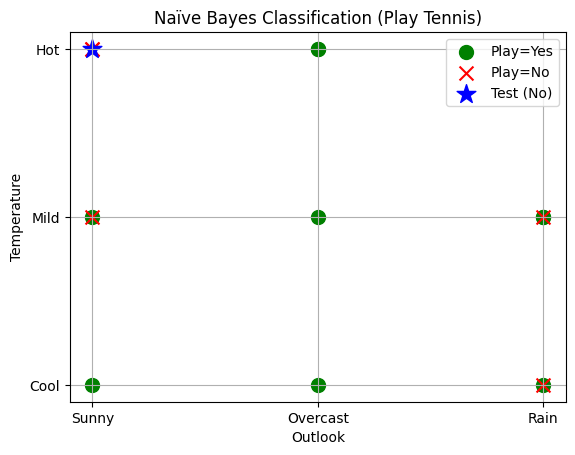

In [6]:
# Encode categorical values into integers for plotting
outlook_map = {"Sunny": 0, "Overcast": 1, "Rain": 2}
temp_map = {"Cool": 0, "Mild": 1, "Hot": 2}

# Prepare training points
X = [(outlook_map[row[0]], temp_map[row[1]]) for row in dataset]
y = [row[2] for row in dataset]

# Split Yes/No for plotting
x_yes = [X[i][0] for i in range(len(X)) if y[i] == "Yes"]
y_yes = [X[i][1] for i in range(len(X)) if y[i] == "Yes"]
x_no = [X[i][0] for i in range(len(X)) if y[i] == "No"]
y_no = [X[i][1] for i in range(len(X)) if y[i] == "No"]

# Plot dataset
plt.scatter(x_yes, y_yes, color="green", label="Play=Yes", marker="o", s=100)
plt.scatter(x_no, y_no, color="red", label="Play=No", marker="x", s=100)

# Plot test sample
test_x = outlook_map[test_sample[0]]
test_y = temp_map[test_sample[1]]
plt.scatter(test_x, test_y, color="blue", marker="*", s=200, label=f"Test ({prediction})")

# Set axis ticks to original category names
plt.xticks(list(outlook_map.values()), list(outlook_map.keys()))
plt.yticks(list(temp_map.values()), list(temp_map.keys()))

plt.xlabel("Outlook")
plt.ylabel("Temperature")
plt.title("Naïve Bayes Classification (Play Tennis)")
plt.legend()
plt.grid(True)
plt.show()